In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [4]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
airbnb.isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [6]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df = airbnb.copy()
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [8]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
nb = df.set_index(['neighbourhood_group'])
nb_group = nb.groupby('neighbourhood_group')

## Let's count hosts in neighbourhood in each neighbourhood_group
First let's we make the function to display barplot

In [76]:
def count_host(neighbourhood):
    df = nb_group.get_group(neighbourhood).sort_values('neighbourhood')
    plt.figure(figsize=(16,10))
    sns.barplot(x=df['neighbourhood'].value_counts().index, y=df['neighbourhood'].value_counts())
    plt.xticks(rotation=90)
    for i in list(range(len(df['neighbourhood'].value_counts().index))):
        if df['neighbourhood'].value_counts().max() > 1000:
            plt.text(i-0.5, df['neighbourhood'].value_counts()[i]+50, df['neighbourhood'].value_counts()[i])
        elif 100 <= df['neighbourhood'].value_counts().max() <= 1000:
            plt.text(i-0.5, df['neighbourhood'].value_counts()[i]+5, df['neighbourhood'].value_counts()[i])
        elif df['neighbourhood'].value_counts().max() <= 100:
            plt.text(i-0.5, df['neighbourhood'].value_counts()[i]+1, df['neighbourhood'].value_counts()[i])
    plt.title(f'Total Host In Each Neighbourhood In {neighbourhood}')
    return plt.show()

## 1. Brooklyn

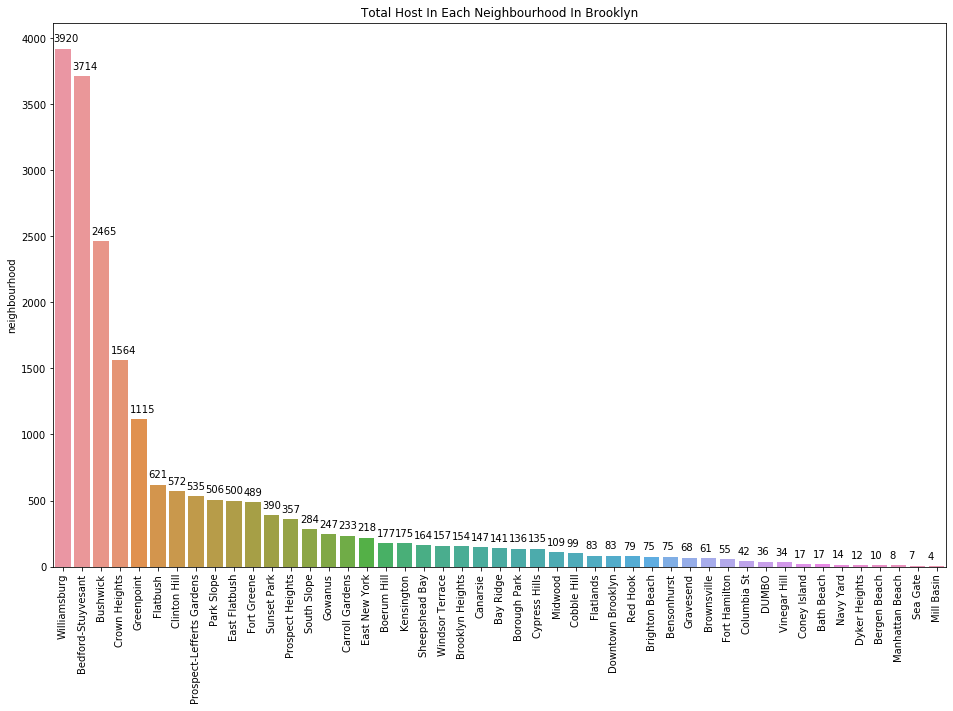

In [77]:
count_host('Brooklyn')

## 2. Manhattan

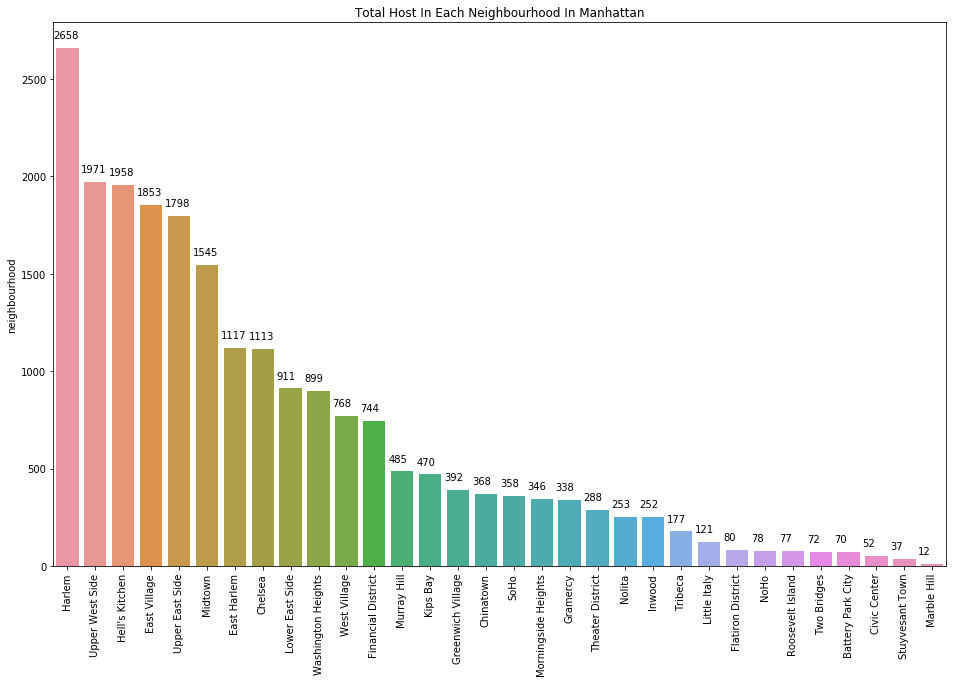

In [78]:
count_host('Manhattan')

## 3. Queens

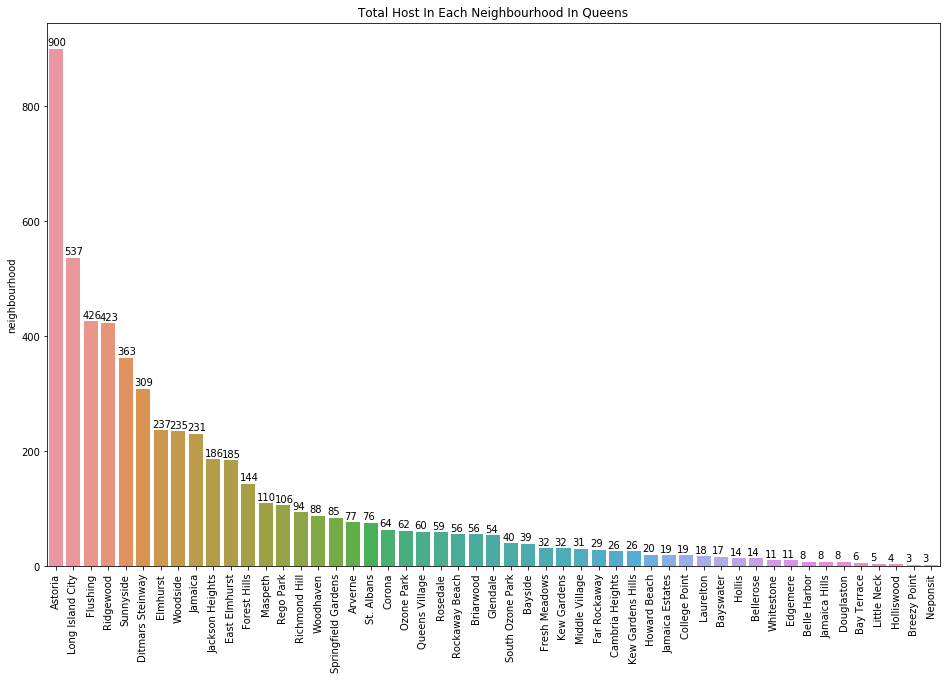

In [79]:
count_host('Queens')

## 4. Staten Island

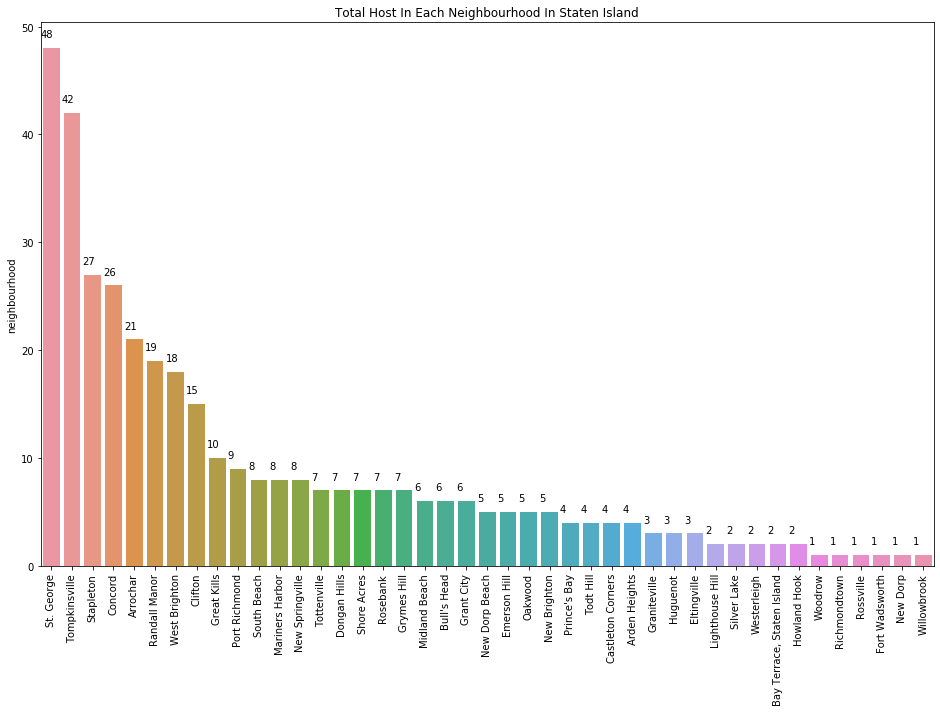

In [80]:
count_host('Staten Island')

## 5. Bronx

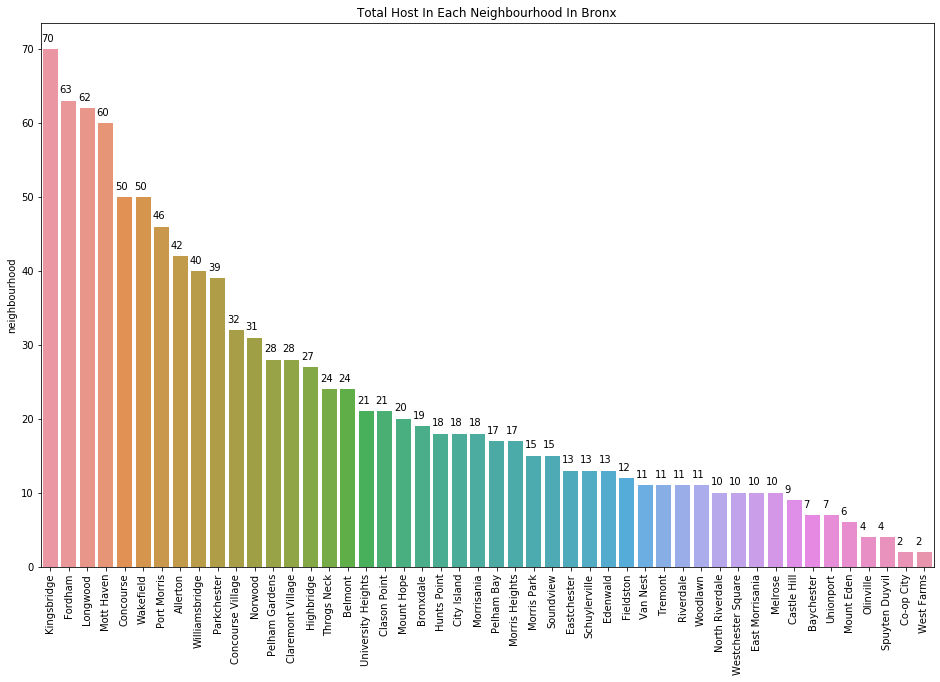

In [81]:
count_host('Bronx')

## Next we drop all columns that are not a categorial. But keep the neighbourhood.
We are gonna make those values in categorial column into label (int)

In [26]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [27]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [28]:
ab = df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude',
              'last_review', 'reviews_per_month', 'calculated_host_listings_count'], axis=1)
ab

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,355
2,Manhattan,Harlem,Private room,150,3,0,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0
...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,9
48891,Brooklyn,Bushwick,Private room,40,4,0,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,2


Neighbourhood Group:
- Brooklyn
- Manhattan
- Queens
- Staten Island
- Bronx

In [29]:
ab['nbg_label'] = ab['neighbourhood_group'].map({'Brooklyn': 1, 'Manhattan': 2, 'Queens': 3, 'Staten Island': 4, 'Bronx': 5})
ab

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365,nbg_label
0,Brooklyn,Kensington,Private room,149,1,9,365,1
1,Manhattan,Midtown,Entire home/apt,225,1,45,355,2
2,Manhattan,Harlem,Private room,150,3,0,365,2
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194,1
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0,2
...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,9,1
48891,Brooklyn,Bushwick,Private room,40,4,0,36,1
48892,Manhattan,Harlem,Entire home/apt,115,10,0,27,2
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,2,2


In [30]:
nb_label, cat_nb = pd.factorize(ab.neighbourhood)
print(nb_label)

[0 1 2 ... 2 7 7]


In [31]:
ab['nb_label'] = nb_label
ab

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365,nbg_label,nb_label
0,Brooklyn,Kensington,Private room,149,1,9,365,1,0
1,Manhattan,Midtown,Entire home/apt,225,1,45,355,2,1
2,Manhattan,Harlem,Private room,150,3,0,365,2,2
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194,1,3
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0,2,4
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,9,1,6
48891,Brooklyn,Bushwick,Private room,40,4,0,36,1,21
48892,Manhattan,Harlem,Entire home/apt,115,10,0,27,2,2
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,2,2,7


In [32]:
ab.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [33]:
ab['room_label'] = ab['room_type'].map({'Private room': 1, 'Entire home/apt': 2, 'Shared room': 3})
ab

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365,nbg_label,nb_label,room_label
0,Brooklyn,Kensington,Private room,149,1,9,365,1,0,1
1,Manhattan,Midtown,Entire home/apt,225,1,45,355,2,1,2
2,Manhattan,Harlem,Private room,150,3,0,365,2,2,1
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194,1,3,2
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0,2,4,2
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,9,1,6,1
48891,Brooklyn,Bushwick,Private room,40,4,0,36,1,21,1
48892,Manhattan,Harlem,Entire home/apt,115,10,0,27,2,2,2
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,2,2,7,3


## For the record
`neighbourhood_group` labels:
- Brooklyn: 1
- Manhattan: 2
- Queens: 3
- Staten Island: 4
- Bronx: 5

`room_type` labels:
- Private room: 1
- Entire home/apt: 2
- Shared room: 3

In [34]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
neighbourhood_group    48895 non-null object
neighbourhood          48895 non-null object
room_type              48895 non-null object
price                  48895 non-null int64
minimum_nights         48895 non-null int64
number_of_reviews      48895 non-null int64
availability_365       48895 non-null int64
nbg_label              48895 non-null int64
nb_label               48895 non-null int64
room_label             48895 non-null int64
dtypes: int64(7), object(3)
memory usage: 3.7+ MB


In [35]:
ab_object = ab.select_dtypes(exclude='int64')
ab_object

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room
48891,Brooklyn,Bushwick,Private room
48892,Manhattan,Harlem,Entire home/apt
48893,Manhattan,Hell's Kitchen,Shared room


In [36]:
ab = ab.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1)
ab = ab[['nbg_label', 'nb_label', 'room_label', 'minimum_nights', 'number_of_reviews', 'availability_365', 'price']]
ab

,nbg_label,nb_label,room_label,minimum_nights,number_of_reviews,availability_365,price
0,1,0,1,1,9,365,149
1,2,1,2,1,45,355,225
2,2,2,1,3,0,365,150
3,1,3,2,1,270,194,89
4,2,4,2,10,9,0,80
...,...,...,...,...,...,...,...
48890,1,6,1,2,0,9,70
48891,1,21,1,4,0,36,40
48892,2,2,2,10,0,27,115
48893,2,7,3,1,0,2,55


In [37]:
scaled = ab.copy()

In [38]:
scaled = (ab - ab.min()) / (ab.max()-ab.min())
scaled['price'] = ab.price
scaled

,nbg_label,nb_label,room_label,minimum_nights,number_of_reviews,availability_365,price
0,0.00,0.000000,0.0,0.000000,0.014308,1.000000,149
1,0.25,0.004545,0.5,0.000000,0.071542,0.972603,225
2,0.25,0.009091,0.0,0.001601,0.000000,1.000000,150
3,0.00,0.013636,0.5,0.000000,0.429253,0.531507,89
4,0.25,0.018182,0.5,0.007206,0.014308,0.000000,80
...,...,...,...,...,...,...,...
48890,0.00,0.027273,0.0,0.000801,0.000000,0.024658,70
48891,0.00,0.095455,0.0,0.002402,0.000000,0.098630,40
48892,0.25,0.009091,0.5,0.007206,0.000000,0.073973,115
48893,0.25,0.031818,1.0,0.000000,0.000000,0.005479,55


## The correlation is so LOW!

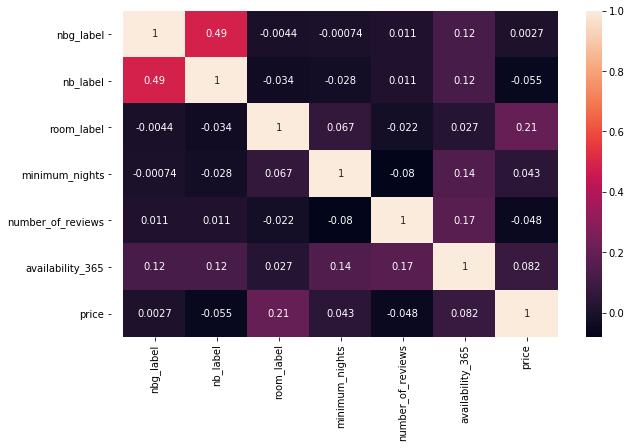

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(scaled.corr(), annot=True)
plt.xlim(-0.2, 7)
plt.ylim(7, 0)
plt.show()

## Let's try to get correlation by each Neighbourhood Group
First, we make a function to display heatmap for each neighbourhood

In [87]:
def corr_nb(label):
    df = ab[ab.nbg_label == label]
    df.drop('nbg_label', axis=1, inplace=True)
    plt.figure(figsize=(10,6))
    sns.heatmap(df.corr(), annot=True)
    plt.xlim(-0.2, 6)
    plt.ylim(6, 0)
    return plt.show()

## 1. Brooklyn

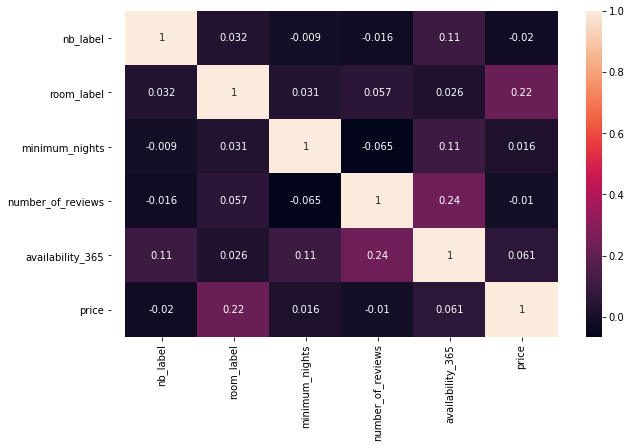

In [88]:
corr_nb(1)

## 2. Manhattan

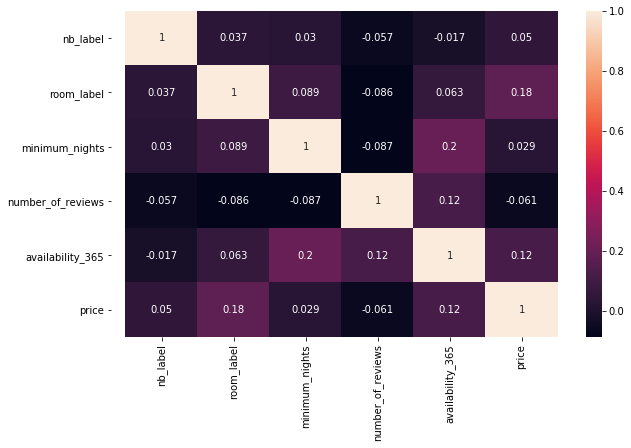

In [89]:
corr_nb(2)

## 3. Queens

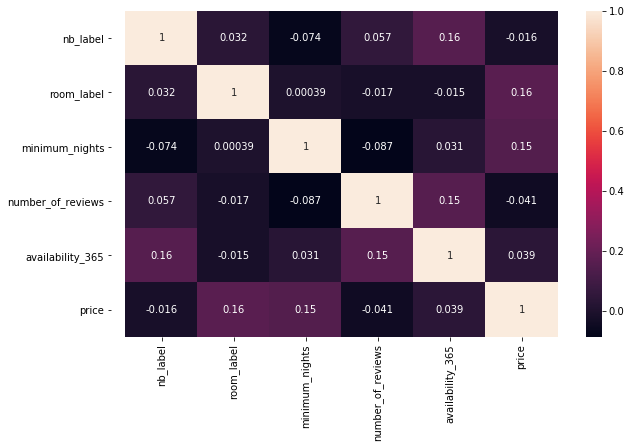

In [90]:
corr_nb(3)

## 4. Staten Island

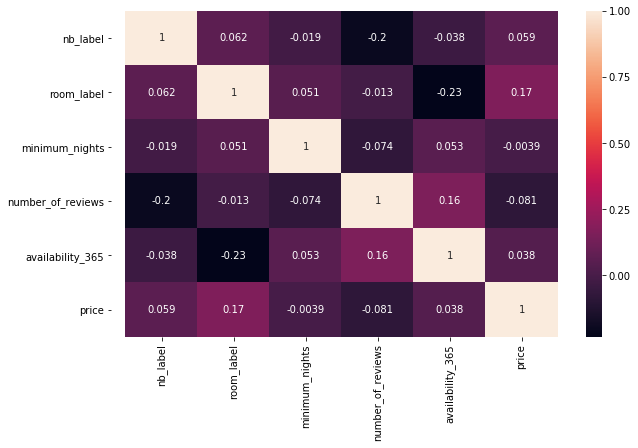

In [91]:
corr_nb(4)

## 5. Bronx

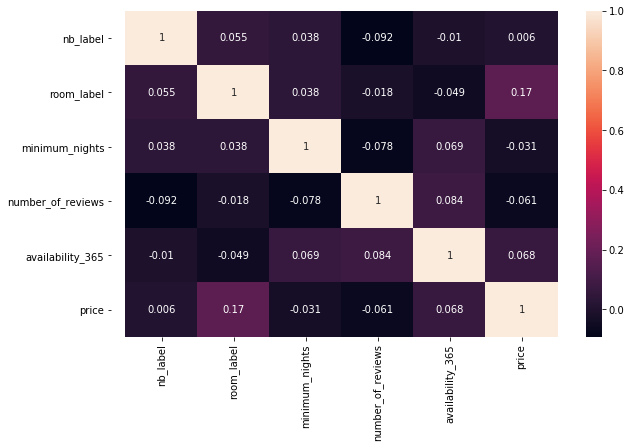

In [92]:
corr_nb(5)

## Still low..
Dari tampilan data di atas, dapat disimpulkan bahwa semua kolom yang dibutuhkan untuk bisa memberikan prediksi terhadap harga, mayoritas memiliki korelasi yang rendah. Oleh karena itu kita akan kembali menggunakan data awal, tanpa membedakan neigbourhood_group 

In [50]:
ab

,nbg_label,nb_label,room_label,minimum_nights,number_of_reviews,availability_365,price
0,1,0,1,1,9,365,149
1,2,1,2,1,45,355,225
2,2,2,1,3,0,365,150
3,1,3,2,1,270,194,89
4,2,4,2,10,9,0,80
...,...,...,...,...,...,...,...
48890,1,6,1,2,0,9,70
48891,1,21,1,4,0,36,40
48892,2,2,2,10,0,27,115
48893,2,7,3,1,0,2,55


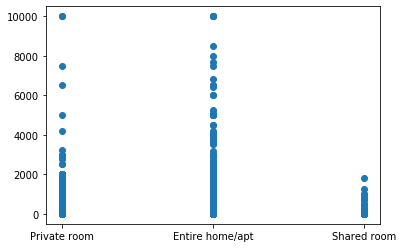

In [51]:
plt.scatter(ab.room_label, ab.price)
plt.xticks(ticks=[1,2,3], labels=['Private room','Entire home/apt', 'Shared room'])
plt.show()

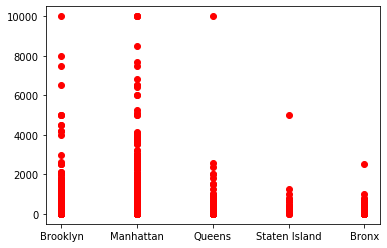

In [52]:
plt.scatter(ab.nbg_label, ab.price, color='red')
plt.xticks(ticks=[1,2,3,4,5], labels=['Brooklyn','Manhattan', 'Queens', 'Staten Island', 'Bronx'])
plt.show()

In [53]:
scaled

,nbg_label,nb_label,room_label,minimum_nights,number_of_reviews,availability_365,price
0,0.00,0.000000,0.0,0.000000,0.014308,1.000000,149
1,0.25,0.004545,0.5,0.000000,0.071542,0.972603,225
2,0.25,0.009091,0.0,0.001601,0.000000,1.000000,150
3,0.00,0.013636,0.5,0.000000,0.429253,0.531507,89
4,0.25,0.018182,0.5,0.007206,0.014308,0.000000,80
...,...,...,...,...,...,...,...
48890,0.00,0.027273,0.0,0.000801,0.000000,0.024658,70
48891,0.00,0.095455,0.0,0.002402,0.000000,0.098630,40
48892,0.25,0.009091,0.5,0.007206,0.000000,0.073973,115
48893,0.25,0.031818,1.0,0.000000,0.000000,0.005479,55


In [54]:
shuffled_index = np.random.permutation(scaled.index)
scaled = scaled.reindex(shuffled_index)

In [55]:
scaled

,nbg_label,nb_label,room_label,minimum_nights,number_of_reviews,availability_365,price
20855,0.25,0.104545,0.0,0.010408,0.006359,0.000000,52
47346,0.25,0.031818,0.5,0.000000,0.000000,0.915068,300
10844,0.25,0.127273,0.5,0.004003,0.006359,0.000000,119
704,0.75,0.390909,0.5,0.000801,0.012719,0.967123,125
19813,0.00,0.054545,0.0,0.003203,0.041335,0.000000,89
...,...,...,...,...,...,...,...
2384,0.00,0.095455,0.5,0.000801,0.049285,0.000000,160
27911,0.25,0.009091,0.0,0.000801,0.000000,0.000000,36
7452,0.25,0.309091,0.0,0.000801,0.216216,0.090411,99
11164,0.00,0.027273,0.5,0.004804,0.003180,0.000000,130


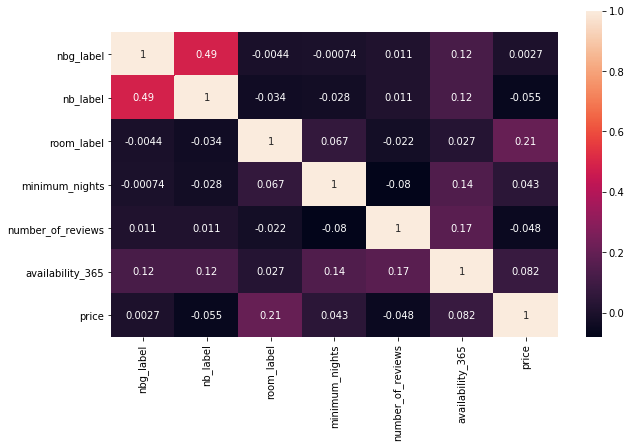

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(scaled.corr(), annot=True)
plt.xlim(0, 7)
plt.ylim(7, -0.5)
plt.show()

## Train and Test Splitting

In [56]:
X = scaled[['nbg_label', 'nb_label', 'room_label', 'minimum_nights', 'number_of_reviews', 'availability_365']]
y = scaled['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## 1. Decision Tree Regressor